# **Assignment 1: Prototype**  

## **Objective:**  
Build a prototype for SMS spam classification.  

---

### **Tasks**  

#### **In `prepare.ipynb`, write the functions to:**
1. Load the data from a given file path.  
2. Preprocess the data (if needed).  
3. Split the data into train/validation/test.  
4. Store the splits at `train.csv`, `validation.csv`, and `test.csv`.  

---

#### **In `train.ipynb`, write the functions to:**
1. Fit a model on train data.  
2. Score a model on given data.  
3. Evaluate the model predictions.  
4. Validate the model:  
   - Fit on train.  
   - Score on train and validation.  
   - Evaluate on train and validation.  
   - Fine-tune hyper-parameters using train and validation (if necessary).  
5. Score three benchmark models on test data and select the best one.  

---

### **Notes:**  
- You may download the SMS spam data from [UCI SMS Spam Collection Dataset](https://archive.ics.uci.edu/ml/datasets/sms+spam+collection).  
- You may refer to [Radim Řehůřek's Data Science Python](https://radimrehurek.com/data_science_python/) for building a prototype.  
- You may refer to the first three chapters of [An Introduction to Statistical Learning](https://www.statlearning.com/) for basic ML concepts.  
- You may refer to the Solution Design example covered in the class as a guideline for experiment design.  

---

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import re
import string
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
import os

random_state=24

#### 1. Load the data.

In [56]:
# 1. Load the data
raw_messages = pd.read_csv('/Users/kalyani/Documents/CMI/Sem 4/AML/Assignment 1/sms+spam+collection/SMSSpamCollection', sep='\t', quoting=csv.QUOTE_NONE,names=["label", "message"])

In [57]:
raw_messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


####  2. Preprocess the data

In [58]:
# Define stop words and stemmer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [59]:
raw_messages.isnull().sum()

label      0
message    0
dtype: int64

In [60]:
np.unique(raw_messages['label'],return_counts=True)

(array(['ham', 'spam'], dtype=object), array([4827,  747]))

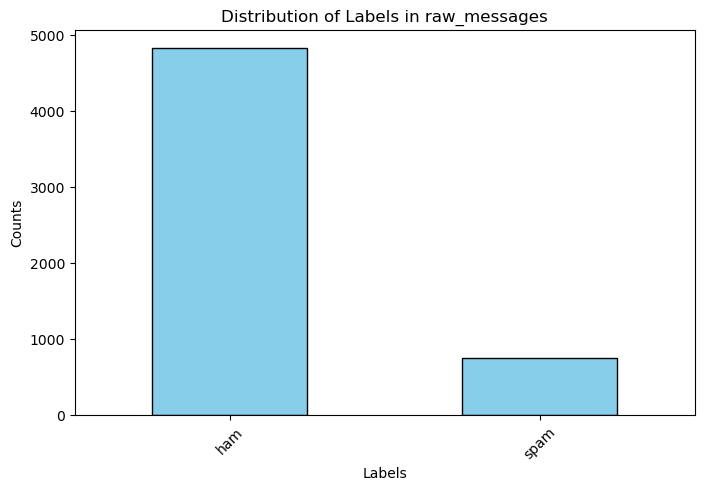

In [61]:
# Count occurrences of each unique label
label_counts = raw_messages['label'].value_counts()

# Plot the counts
plt.figure(figsize=(8, 5))
label_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.title('Distribution of Labels in raw_messages')
plt.xticks(rotation=45)
plt.show()

In [62]:
def preprocess_text(text):
    """
    Clean and preprocess a single text message.
    """
    text = text.lower() # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation)) # Remove punctuation
    tokens = word_tokenize(text) # Tokenize words
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

def preprocess_data(data):
    """
    Preprocess the entire dataset.
    """
    data['message'] = data['message'].apply(preprocess_text)
    # Encode labels: spam -> 1, ham -> 0
    data['label'] = data['label'].map({'spam': 1, 'ham': 0})
    return data

In [63]:
data = preprocess_data(raw_messages)

In [64]:
data.head()

,label,message
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry wkly comp win fa cup final tkts st ...
3,0,u dun say early hor u c already say
4,0,nah dont think go usf life around though


In [65]:
X = data['message']
y = data['label']

#### 3. Split the data into train/validation/test. 

In [66]:
def split_and_save_data(X, y, label_column="label", test_size=0.2, val_size=0.1, random_state=24):
    """
    Split the data into train, validation, and test sets, and save them as CSV files.
    """
    #Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )
    
    #Train-validation split
    X_train, X_val, y_train, y_val = train_test_split(
        X_train, y_train, test_size=val_size, random_state=random_state, stratify=y_train
    )
    
    train_df = pd.DataFrame(X_train)
    train_df['label'] = y_train

    test_df = pd.DataFrame(X_test)
    test_df['label'] = y_test

    val_df = pd.DataFrame(X_val)
    val_df['label'] = y_val

    train_df.to_csv(f"./train.csv", index=False)
    test_df.to_csv(f"./test.csv", index=False)
    val_df.to_csv(f"./val.csv", index=False)

    print("Data splits saved successfully!")

In [67]:
split_and_save_data(X, y, label_column="label", test_size=0.2, val_size=0.1, random_state=24)

Data splits saved successfully!
